<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین سوم</b>
</font>
<br>
<br>
موعد تحویل: ۴ دی <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: </b>
پردیس زهرایی

<b> شماره دانشجویی: </b>
99109777

<b> لینک colab: </b>

https://colab.research.google.com/drive/1wpx-cVh56gExkmKAyeCV3chmVM4ewHwY?usp=sharing</div>
</span>

<div dir='rtl'>
<h1>
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> embedding </li>
<li> کلاسه‌بندی متن </li>
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

دیتاست این تمرین از دیتاست‌های kaggle انتخاب شده‌است و لینک آن در بخش اول تمرین در اختیار شما قرار داده شده است.

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید.
</p>
</div>

In [ ]:
!pip install tqdm
!pip install yellowbrick

In [ ]:
!pip install opendatasets
!pip install fasttext

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""


In [ ]:
import opendatasets as od
import kaggle
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import fasttext
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import os


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<div dir='rtl'>
<h1>1.
دریافت و آماده‌سازی دیتاست
</h1>
<p>
دیتاست استفاده شده در این تمرین، مجموعه‌ای عناوین، خلاصه، و ژانر چندین کتاب است.
این دیتاست در kaggle موجود است.
ابتدا این دیتاست را با استفاده از kaggle api دریافت کنید و سپس آن را لود کنید.
<br/>
لینک دیتاست: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
<br>
<i>در صورتی که با خطای 443 مواجه شدید، یا از پراکسی استفاده کنید یا از کولب.</i>
</p>
</div>

In [ ]:
!kaggle datasets download -d athu1105/book-genre-prediction
import zipfile
import pandas as pd
with zipfile.ZipFile('/content/book-genre-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


df = pd.read_csv('data.csv')

print(df.head())


  0% 0.00/3.73M [00:00<?, ?B/s]
100% 3.73M/3.73M [00:00<00:00, 102MB/s]
   index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


<div dir='rtl'>
<p>
حال در این مرحله، به پیش‌پردازش متن می‌پردازیم. این پیش‌پردازش باید روی هر دو ستون title و summary اعمال شود.
برای پیش‌پردازش نیازی نیست که هرکدام از اعمال پیش‌پردازش را خودتان مانند تمارین قبل پیاده کنید. برای پیاده‌سازی تابع زیر می‌توانید از کتابخانه‌های معمول برای این کار بهره ببرید.
</p>
</div>

<div dir="rtl">
در نهایت بعد از اپلای کردن پیش‌پردازش روی هر دو ستون، دو ستون پیش‌پردازش شده را با هم ادغام کنید و آن را در یک آرایه به نام X قرار دهید.
</div>

Here we first do an EDA using distributions, wordclouds, ... later we would preprocess the summary and title.
Previously I have declared a more advanced preprocessing method that I would use that to see the diffrence as well, but as we would need embeddings using fasttext, the normal function seems sufficient enough.

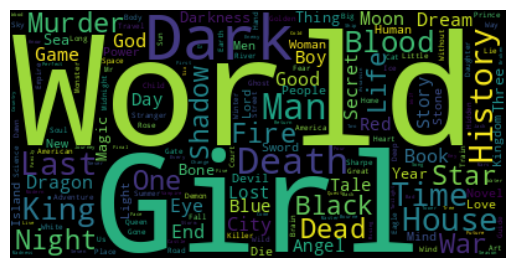

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
text = ' '.join(df['title'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


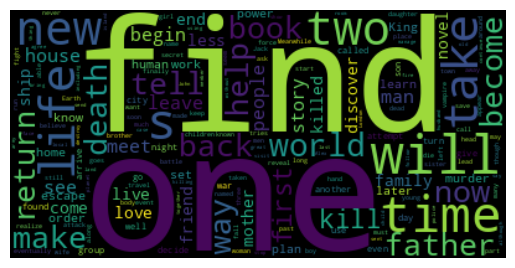

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

text = ' '.join(df['summary'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
print(df.head())

print(df.describe(include='all'))

print("Number of unique genres: ", df['genre'].nunique())
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())


   index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  
              index      title     genre  \
count   4657.000000       4657      4657   
unique          NaN       4296        10   
top             NaN  Bloodline  thriller   
freq            NaN          4      1023   
mean    2328.000000        NaN       NaN   
std     1344.504432        NaN       NaN   
min        0.000000        NaN       NaN   
25%     1164.000000        Na

NameError: ignored

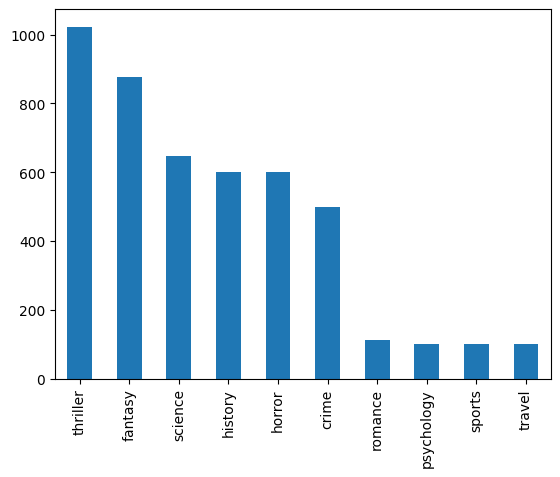

In [ ]:
df['genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


As we can see the data isnt distributed uniform and categories like "travel", "sport" seems to have a little data so classifying and clustering could be difficult.
The class below is the more advanced preprocessing function

In [ ]:
class Preprocessor:
    def __init__(self):

        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        text = text.lower()
        doc = self.nlp(text)
        text = ' '.join([token.lemma_ for token in doc])

        return text

    def remove_punctuations(self, text):
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stopwords]
preprocessor = Preprocessor()

df['advanced_processed_title'] = df['title'].apply(preprocessor.preprocess)

df['advanced_processed_summary'] = df['summary'].apply(preprocessor.preprocess)
from collections import Counter

grouped = df.groupby('genre')

for name, group in grouped:
    text = ' '.join(group['advanced_processed_title'])
    text+=' '.join(group['advanced_processed_summary'])
    words = nltk.word_tokenize(text)

    counter = Counter(words)

    common = counter.most_common(5)

    print(f"Genre: {name}")
    for word, count in common:
        print(f"Word: {word}, Count: {count}")
    print("\n")


Genre: crime
Word: find, Count: 760
Word: murder, Count: 735
Word: one, Count: 576
Word: man, Count: 498
Word: go, Count: 456


Genre: fantasy
Word: find, Count: 1088
Word: one, Count: 1040
Word: take, Count: 836
Word: world, Count: 669
Word: go, Count: 652


Genre: history
Word: take, Count: 809
Word: one, Count: 675
Word: find, Count: 639
Word: father, Count: 590
Word: man, Count: 562


Genre: horror
Word: find, Count: 850
Word: kill, Count: 847
Word: one, Count: 783
Word: go, Count: 676
Word: vampire, Count: 605


Genre: psychology
Word: life, Count: 98
Word: book, Count: 94
Word: people, Count: 87
Word: new, Count: 84
Word: make, Count: 67


Genre: romance
Word: I, Count: 124
Word: love, Count: 122
Word: one, Count: 116
Word: less, Count: 114
Word: life, Count: 86


Genre: science
Word: one, Count: 734
Word: time, Count: 725
Word: human, Count: 636
Word: take, Count: 597
Word: world, Count: 585


Genre: sports
Word: I, Count: 221
Word: one, Count: 128
Word: less, Count: 100
Word: t

This is the asked function

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    if punctuation_removal:
        text = re.sub(r'[^\w\s]', '', text)

    if lower_case:
        text = text.lower()

    if stopword_removal:
        stop_words = set(stopwords.words('english'))
        stop_words.update(stopwords_domain)
        word_tokens = word_tokenize(text)
        text = [word for word in word_tokens if word not in stop_words and len(word) >= minimum_length]

    return text


df['preprocessed_title'] = df['title'].apply(preprocess_text)
df['preprocessed_summary'] = df['summary'].apply(preprocess_text)
from collections import Counter

grouped = df.groupby('genre')

for name, group in grouped:
    words = [word for tokens in group['preprocessed_summary'] for word in tokens]
    words+=[word for tokens in group['preprocessed_title'] for word in tokens]
    counter = Counter(words)

    common = counter.most_common(5)

    print(f"Genre: {name}")
    for word, count in common:
        print(f"Word: {word}, Count: {count}")
    print("\n")


Genre: crime
Word: one, Count: 552
Word: murder, Count: 464
Word: man, Count: 357
Word: police, Count: 322
Word: death, Count: 319


Genre: fantasy
Word: one, Count: 955
Word: world, Count: 597
Word: new, Count: 553
Word: find, Count: 540
Word: time, Count: 539


Genre: history
Word: one, Count: 631
Word: father, Count: 492
Word: two, Count: 427
Word: time, Count: 426
Word: also, Count: 418


Genre: horror
Word: one, Count: 732
Word: anita, Count: 494
Word: house, Count: 466
Word: new, Count: 405
Word: also, Count: 403


Genre: psychology
Word: book, Count: 86
Word: people, Count: 84
Word: new, Count: 82
Word: us, Count: 66
Word: life, Count: 56


Genre: romance
Word: less, Count: 114
Word: one, Count: 110
Word: love, Count: 104
Word: new, Count: 73
Word: life, Count: 71


Genre: science
Word: one, Count: 684
Word: time, Count: 654
Word: world, Count: 470
Word: new, Count: 431
Word: earth, Count: 427


Genre: sports
Word: one, Count: 113
Word: less, Count: 100
Word: hes, Count: 75
Word

In [ ]:
df['advanced_processed_title_list'] = df['advanced_processed_title'].apply(lambda x: x.split())
df['advanced_processed_summary_list'] = df['advanced_processed_summary'].apply(lambda x: x.split())

In [ ]:
df['concatenated'] = df.apply(lambda row: eval(row['preprocessed_title']) + eval(row['preprocessed_summary']), axis=1)
X=df['concatenated']

In [ ]:
X=df['concatenated']
X

0       [drowned, wednesday, drowned, wednesday, first...
1       [lost, hero, book, opens, jason, awakens, scho...
2       [eyes, overworld, cugel, easily, persuaded, me...
3       [magics, promise, book, opens, heraldmage, van...
4       [taran, wanderer, taran, gurgi, returned, caer...
                              ...                        
4652    [hounded, atticus, osullivan, last, druids, li...
4653    [charlie, chocolate, factory, charlie, buckets...
4654    [red, rising, live, dream, children, born, fre...
4655    [frostbite, rose, loves, dimitri, dimitri, mig...
4656    [radiance, prince, value, brishen, khaskem, pr...
Name: concatenated, Length: 4657, dtype: object

In [ ]:
X_advanced = df['advanced_processed_title_list'] + df['advanced_processed_summary_list']
df['concatenated_advanced'] = df.apply(lambda row: eval(row['advanced_processed_title_list']) + eval(row['advanced_processed_summary_list']), axis=1)


In [ ]:
X_advanced=df['concatenated_advanced']
X_advanced

0       [drown, wednesday, drown, wednesday, first, tr...
1       [lose, hero, book, open, jason, awaken, school...
2       [eye, overworld, cugel, easily, persuade, merc...
3       [magic, promise, book, open, herald, mage, van...
4       [taran, wanderer, taran, gurgi, return, caer, ...
                              ...                        
4652    [hound, atticus, osullivan, last, druid, live,...
4653    [charlie, chocolate, factory, charlie, bucket,...
4654    [red, rise, I, live, dream, child, bear, free,...
4655    [frostbite, rise, love, dimitri, dimitri, migh...
4656    [radiance, prince, value, brishen, khaskem, pr...
Name: concatenated_advanced, Length: 4657, dtype: object

In [ ]:
df.to_csv('final_dataset.csv', index=False)

The final_dataset.csv has all the preprocessed and concatenated texts we need so from now on we will use this

<div dir="rtl">
<h2>1-1.
Embedding
</h2>

در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر کتاب برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
</div>

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import fasttext

class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        with open('fasttext_dataset.txt', 'w') as f:
            for text in texts:
                f.write(' '.join(text) + '\n')
        self.model = fasttext.train_unsupervised('fasttext_dataset.txt', model=self.method)

    def get_query_embedding(self, query, tf_idf_vectorizer,do_preprocess=True):
        if do_preprocess and self.preprocessor is not None:
            query = self.preprocessor(query)
        word_weights = tf_idf_vectorizer.transform([' '.join(query)]).toarray()[0]
        vocab = list(tf_idf_vectorizer.get_feature_names_out())
        vectors = np.zeros((len(query), self.model.get_dimension()))
        for i, word in enumerate(query):
            if word in vocab:
                vectors[i] = self.model[word] * word_weights[vocab.index(word)]
        return np.mean(vectors, axis=0)


    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()
ft_model = FastText(preprocessor=preprocess_text, method='skipgram')

ft_model.train(X)

ft_model.save_FastText_model()

word = 'queen'
neighbors = ft_model.model.get_nearest_neighbors(word, k=5)

for neighbor in neighbors:
    print(f"Word: {neighbor[1]}, Similarity: {neighbor[0]}")

Word: queens, Similarity: 0.917111337184906
Word: mcqueen, Similarity: 0.8867931962013245
Word: quen, Similarity: 0.8232218623161316
Word: kingsguard, Similarity: 0.7820798754692078
Word: pendragon, Similarity: 0.7808555364608765


fasttext model is huge so I saved it and later would load it to use it for my embeddings the file is FastText_model.bin

In [ ]:
ft_model = FastText(preprocessor=preprocess_text, method='skipgram')
ft_model.load_FastText_model("FastText_model.bin")

<div dir="rtl">
در این مرحله آرایه X را روی TFIDF فیت می‌کنیم.
</div>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        data = [' '.join(doc) for doc in data]
        self.vectorizer.fit(data)
tfidf = TF_IDF()
tfidf.fit_vectorizer(X)
query = "king and queen"
embedding = ft_model.get_query_embedding(query, tfidf.vectorizer)


In [ ]:
embedding

array([-3.15886810e-01,  1.09287654e-01,  3.92305851e-02, -3.70585769e-01,
       -6.47144377e-01,  5.75570632e-02, -1.57235984e-01,  2.77286977e-01,
       -1.26963740e-01, -1.90553464e-01,  5.98915415e-02, -2.25523010e-01,
       -3.31003234e-01,  3.90784204e-01, -8.60032048e-02,  5.05276099e-01,
        1.54597491e-01,  8.41772128e-02, -1.55663874e-01,  7.70101659e-02,
       -3.90494958e-01, -5.75679019e-02, -1.00895901e-01,  8.99732281e-02,
        3.89637135e-02, -1.09624453e-01,  7.24071034e-02,  4.54017296e-02,
       -1.93794606e-01,  1.30870704e-01, -3.05945598e-01, -2.06615888e-01,
        3.95101875e-01, -5.24778683e-02,  4.32777074e-02,  2.61085637e-01,
       -2.10127110e-01,  2.10933879e-01, -2.59579465e-01,  2.11198926e-02,
       -3.06429610e-01,  4.58235711e-01, -1.04999363e-01, -1.54618226e-01,
        6.86109774e-02,  1.03700966e-01,  2.42680766e-01, -3.79004409e-02,
        9.69860647e-02, -4.08924900e-01, -3.09690837e-01, -1.88996626e-01,
       -2.21958570e-01,  

<div dir="rtl">
در نهایت، تمامی entry های درون X را به صورت امبدینگ دربیاورید و آن را در X ذخیره کنید.
</div>

This embedding process is time consuming so after running it the first time I saved it into npy file and load it when I want to use it later, for the implementation I used chunk sizes so in case of intrupt I dont lose my progress

In [ ]:
from tqdm import tqdm
import numpy as np
import os

chunk_size = len(X) // 5

embeddings = []

for i in range(0, len(X), chunk_size):
    chunk = X[i:i+chunk_size]

    for doc in tqdm(chunk, desc=f"Processing documents {i}-{i+chunk_size}"):
        doc_str = ' '.join(doc)
        embedding = ft_model.get_query_embedding(doc_str, tfidf.vectorizer)

        embeddings.append(embedding)

    embeddings_array = np.array(embeddings)

    np.save(f'my_embeddings_{i}_{i+chunk_size}.npy', embeddings_array)

    embeddings.clear()

all_embeddings = np.concatenate([np.load(f'my_embeddings_{i}_{i+chunk_size}.npy') for i in range(0, len(X), chunk_size)])

np.save('my_embeddings.npy', all_embeddings)

for i in range(0, len(X), chunk_size):
    os.remove(f'my_embeddings_{i}_{i+chunk_size}.npy')


<div dir='rtl'>
<h2>1-2.
آماده‌سازی داده تمرین و تست
</h2>
<p>
در این بخش ابتدا می‌خواهیم تا داده‌ای که می‌خواهیم بر اساس آن کلاسه‌بندی کتاب‌ها را انجام دهیم، که همان ژانر کتاب‌ها است را انکود کنیم.
<br>
سپس با جداسازی داده آموزش و تست، به آموزش مدل‌های کلاسه‌بند می‌پردازیم.
</p>
</div>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df = pd.read_csv('final_dataset.csv')

genres = df['genre']

encoder = LabelEncoder()

Y = encoder.fit_transform(genres)

embeddings = np.load('my_embeddings.npy')

print('Shape of embeddings:', embeddings.shape)

X_train, X_test, Y_train, Y_test = train_test_split(embeddings, Y, test_size=0.2, random_state=42)



Shape of embeddings: (4657, 100)


<div dir="rtl">
<h1>2.
کلاسه‌بندی متن
</h1>
در این بخش می‌خواهیم تا با استفاده از داده‌هایی که داریم، سه مدل کلاسه‌بندی متن را آموزش دهیم و عملکرد آن‌ها را با هم مقایسه کنیم.
</div>

<div dir="rtl">
<h2>2-1.
SVM و Naive Bayes
</h2>
با استفاده از توابع آماده در sklearn، کلاسه‌بند SVM و Naive Bayes را روی داده آموزش تمرین دهید. سپس، ژانر داده تست را با استفاده از مدل آموزش داده شده پیش‌بینی کنید و آن را در آرایه‌های NB_prediction و SVM_prediction ذخیره کنید.</div>

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

svm_model = svm.SVC()
nb_model = GaussianNB()

svm_model.fit(X_train, Y_train)
nb_model.fit(X_train, Y_train)

SVM_prediction = svm_model.predict(X_test)
NB_prediction = nb_model.predict(X_test)


<div dir="rtl">
<h2>2-2.
Rocchio
</h2>
می‌خواهیم روش Rocchio را از
پایه پیاده‌سازی کنیم.
با توجه به شواهد نوشته شده هر تابع را کامل کنید و با آموزش مدل روی داده‌های train
لیبل‌های داده‌های test
را پیش بینی کنید و آن را در rocchio_prediction ذخیره کنید.
</div>

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

class RocchioTextClassifier:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        self.centroids = None

    def calculate_centroids(self, X, y):
        """
        Calculates the centroids of each class in the dataset. A centroid is defined as the mean vector of all the feature vectors in a class.
        """
        self.centroids = {}
        for label in np.unique(y):
            self.centroids[label] = X[y == label].mean(axis=0)

    def predict_label(self, x):
        """
        Classifies a new instance by finding the class whose centroid is closest to the new instance's vector.
        """
        distances = {label: euclidean_distances([x], [centroid]) for label, centroid in self.centroids.items()}
        return min(distances, key=distances.get)

    def predict(self, X):
        """
        Classifies the array X
        """
        return np.array([self.predict_label(x) for x in X])


In [ ]:
rocchio_classifier = RocchioTextClassifier()
rocchio_classifier.calculate_centroids(X_train, Y_train)
rocchio_prediction = rocchio_classifier.predict(X_test)

<div dir="rtl">
<h2>2-3.
ارزیابی
</h2>
برای هر سه روش پیاده‌سازی شده، معیار‌های ارزیابی زیر را بررسی کنید.
<br>
f1 score, accuracy, precision, recall
<br>
سپس، نتایج به دست آمده را با هم در چهار نمودار مقایسه کنید.
</div>

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

svm_f1 = metrics.f1_score(Y_test , SVM_prediction, average='weighted')
svm_accuracy = metrics.accuracy_score(Y_test , SVM_prediction)
svm_precision = metrics.precision_score(Y_test , SVM_prediction, average='weighted')
svm_recall = metrics.recall_score(Y_test , SVM_prediction, average='weighted')

nb_f1 = metrics.f1_score(Y_test , NB_prediction, average='weighted')
nb_accuracy = metrics.accuracy_score(Y_test , NB_prediction)
nb_precision = metrics.precision_score(Y_test , NB_prediction, average='weighted')
nb_recall = metrics.recall_score(Y_test , NB_prediction, average='weighted')

rocchio_f1 = metrics.f1_score(Y_test , rocchio_prediction, average='weighted')
rocchio_accuracy = metrics.accuracy_score(Y_test , rocchio_prediction)
rocchio_precision = metrics.precision_score(Y_test , rocchio_prediction, average='weighted')
rocchio_recall = metrics.recall_score(Y_test , rocchio_prediction, average='weighted')



recall and accuracy are the same

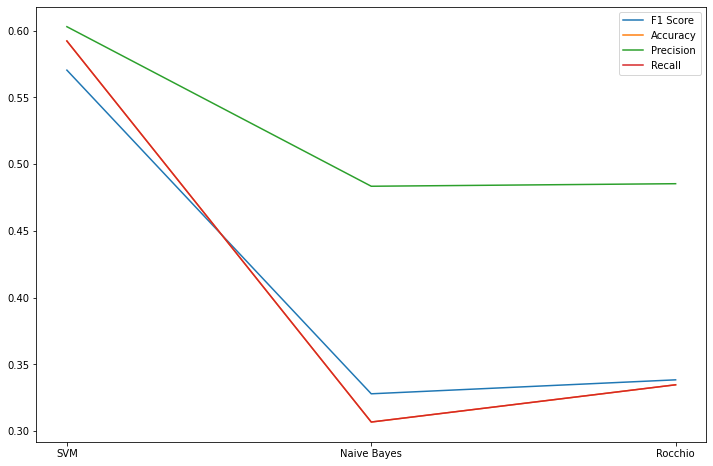

In [ ]:
labels = ['SVM', 'Naive Bayes', 'Rocchio']
f1_scores = [svm_f1, nb_f1, rocchio_f1]
accuracy_scores = [svm_accuracy, nb_accuracy, rocchio_accuracy]
precision_scores = [svm_precision, nb_precision, rocchio_precision]
recall_scores = [svm_recall, nb_recall, rocchio_recall]

x = range(len(labels))

plt.figure(figsize=(12, 8))
plt.plot(x, f1_scores, label='F1 Score')
plt.plot(x, accuracy_scores, label='Accuracy')
plt.plot(x, precision_scores, label='Precision')
plt.plot(x, recall_scores, label='Recall')
plt.xticks(x, labels)
plt.legend()
plt.show()


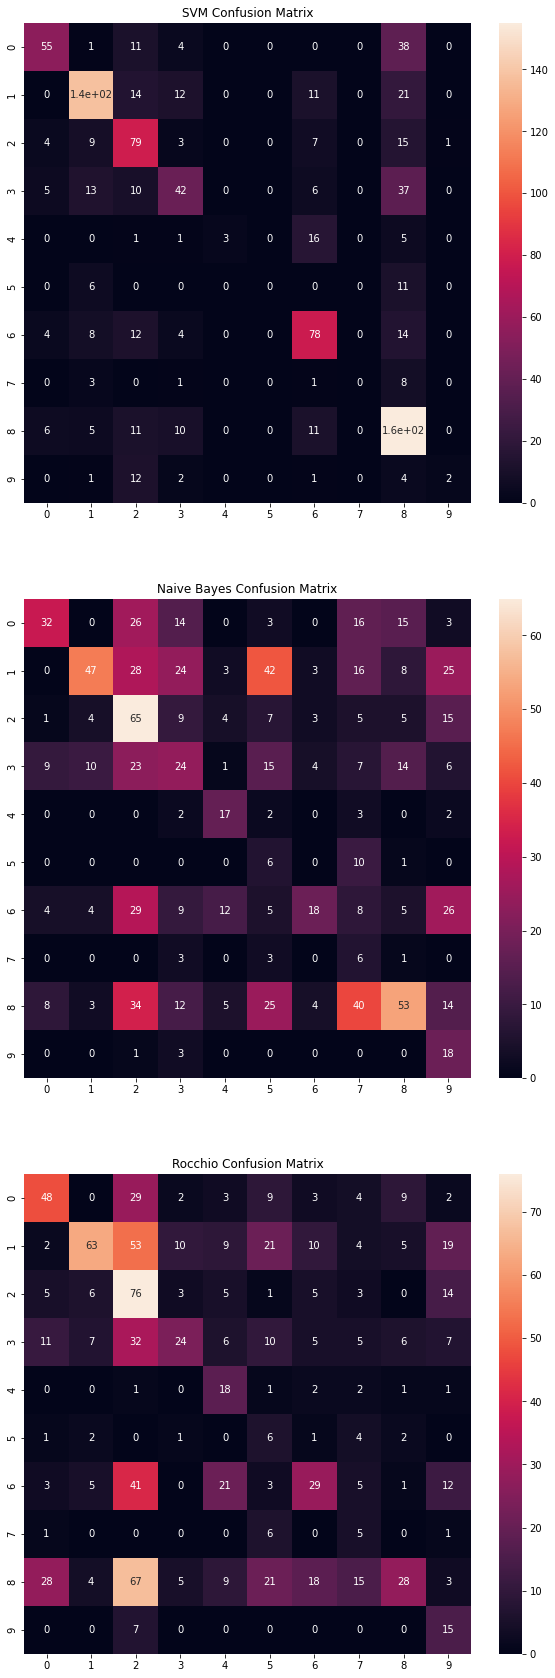

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 30))

svm_cm = metrics.confusion_matrix(Y_test , SVM_prediction)
sns.heatmap(svm_cm, annot=True, ax=axs[0])
axs[0].set_title('SVM Confusion Matrix')

nb_cm = metrics.confusion_matrix(Y_test , NB_prediction)
sns.heatmap(nb_cm, annot=True, ax=axs[1])
axs[1].set_title('Naive Bayes Confusion Matrix')

rocchio_cm = metrics.confusion_matrix(Y_test , rocchio_prediction)
sns.heatmap(rocchio_cm, annot=True, ax=axs[2])
axs[2].set_title('Rocchio Confusion Matrix')

plt.show()


<div dir="rtl">
کدام مدل از همه دقیق‌تر عمل کرد؟ نتیجه‌گیری و تحلیل خود از نتایج ارزیابی را گزارش دهید.
</div>

**SVM** did much better!
The performance of different classifiers like SVM, Naive Bayes, and Rocchio can vary depending on the nature of the data and the problem at hand.

SVMs are particularly effective when the data is linearly separable or nearly separable in a high-dimensional space. SVMs can handle high-dimensional data well, which is often the case with our text data embeddings (Shape of embeddings: (4657, 100)). Moreover, SVMs are robust to sparse data, a common characteristic of text data.

On the other hand, the assumptions made by Naive Bayes and Rocchio might not hold true for our data. Naive Bayes assumes feature independence given the class label, an assumption often violated in text data where words can be highly dependent (see the EDA for clarification as we have shown how the top 5 words of each genre is mostly common). Rocchio, being a simpler method that calculates class centroids, might underperform if the classes are not well-separated or if there are outliers.

These are potential explanations, and the actual reasons can depend on many factors, including specific data characteristics and model parameters.

<div dir="rtl">
<h1>3.
کاهش ابعاد و خوشه‌بندی متن
</h1>
</div>

<div dir="rtl">
<h2>3-1.
کاهش ابعاد
</h2>
</div>

<div dir="rtl">
<h3>3-1-1.
PCA
</h3>
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌های X را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد 90 درصد تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
</div>

In [ ]:

from sklearn.decomposition import PCA

def reduce_dimension(embeddings, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents

    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    return reduced_embeddings

pca = PCA()
pca.fit(embeddings)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_90_variance = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f"The most reduced dimension which has 90% cutoff explained variance is {n_components_90_variance}")


The most reduced dimension which has 90% cutoff explained variance is 19


<div dir="rtl">
در این قسمت می‌توانید برای شهود بهتر، نمودار رسم کنید و همچنین برای ساده‌تر شدن کار، از pipeline‌های sklearn بهره ببرید.
<br>
<i> انجام این کار‌ها صرفا توصیه است و اجباری نیست. </i>
</div>

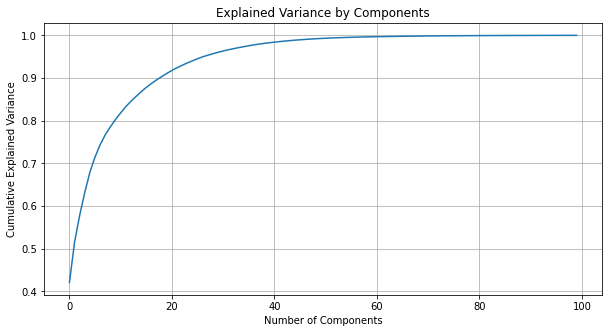

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


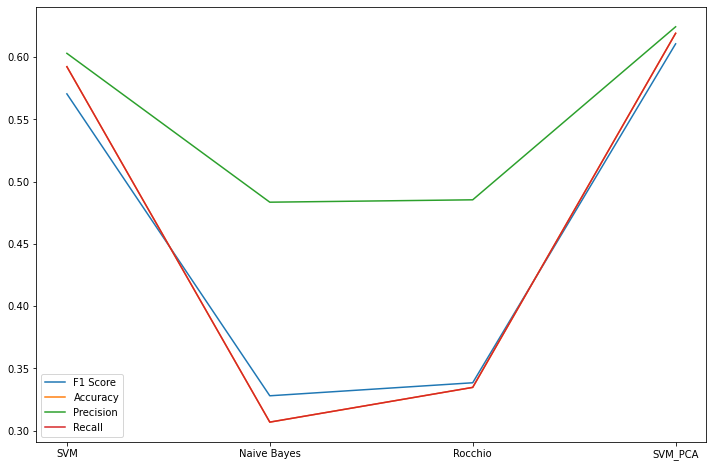

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import svm

pca = PCA()
svm_model = svm.SVC()

pipe = Pipeline(steps=[('pca', pca), ('svm', svm_model)])

pipe.fit(X_train, Y_train)

predictions_pca = pipe.predict(X_test)
pcasvm_f1 = metrics.f1_score(Y_test , predictions_pca, average='weighted')
pcasvm_accuracy = metrics.accuracy_score(Y_test , predictions_pca)
pcasvm_precision = metrics.precision_score(Y_test , predictions_pca, average='weighted')
pcasvm_recall = metrics.recall_score(Y_test , predictions_pca, average='weighted')
labels = ['SVM', 'Naive Bayes', 'Rocchio','SVM_PCA']
f1_scores = [svm_f1, nb_f1, rocchio_f1,pcasvm_f1]
accuracy_scores = [svm_accuracy, nb_accuracy, rocchio_accuracy,pcasvm_accuracy]
precision_scores = [svm_precision, nb_precision, rocchio_precision,pcasvm_precision]
recall_scores = [svm_recall, nb_recall, rocchio_recall,pcasvm_recall]

x = range(len(labels))

plt.figure(figsize=(12, 8))
plt.plot(x, f1_scores, label='F1 Score')
plt.plot(x, accuracy_scores, label='Accuracy')
plt.plot(x, precision_scores, label='Precision')
plt.plot(x, recall_scores, label='Recall')
plt.xticks(x, labels)
plt.legend()
plt.show()

Super interesting how SVM+PCA gets better results !!

<div dir="rtl">
<h3>3-1-2.
TSNE
</h3>
<br>
     برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</div>


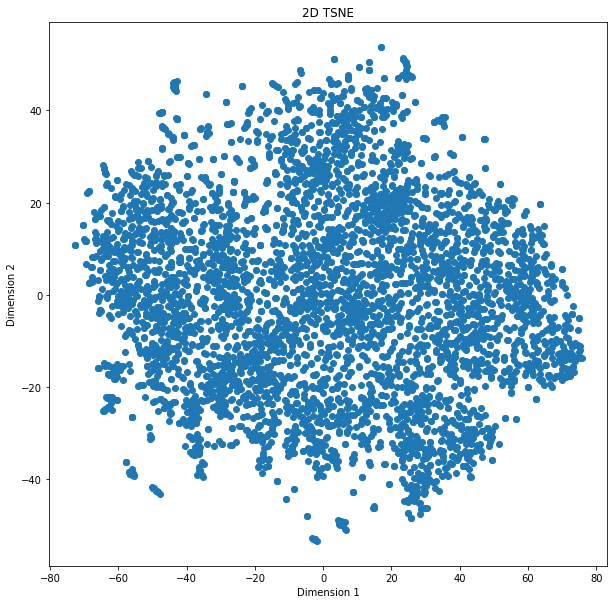

In [ ]:
from typing import List
from sklearn.manifold import TSNE
def convert_to_2d_tsne(emb_vecs):
    """
    Converts each raw embedding vector to 2d vector

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns a list of 2d vectors
    """
    tsne = TSNE(n_components=2)
    emb_vecs_2d = tsne.fit_transform(emb_vecs)
    return emb_vecs_2d
X_2d = convert_to_2d_tsne(np.array(embeddings))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('2D TSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


<div dir="rtl">
<h2>3-2.
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
<h3>3-2-1.
K-Means
</h3>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

<div dir="rtl">
 با استفاده از K-Means خوشه‌های اسناد را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید.
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
</div>

Topics for k=2:
Cluster 0: [('one', 4549), ('new', 2625), ('time', 2563), ('two', 2442), ('also', 2308), ('life', 2251), ('back', 2126), ('find', 1989), ('first', 1953), ('man', 1897)]
Cluster 1: [('one', 321), ('less', 283), ('world', 246), ('story', 208), ('book', 207), ('new', 201), ('novel', 198), ('life', 192), ('time', 169), ('first', 154)]
Topics for k=3:
Cluster 0: [('one', 953), ('less', 754), ('world', 626), ('new', 578), ('life', 570), ('book', 473), ('time', 431), ('story', 423), ('first', 399), ('years', 372)]
Cluster 1: [('one', 3899), ('time', 2281), ('new', 2227), ('two', 2221), ('also', 2141), ('back', 1968), ('life', 1861), ('find', 1789), ('first', 1696), ('man', 1687)]
Cluster 2: [('novel', 47), ('concerns', 28), ('story', 28), ('book', 26), ('world', 23), ('language', 22), ('new', 21), ('time', 20), ('man', 18), ('one', 18)]
Topics for k=4:
Cluster 0: [('novel', 35), ('concerns', 24), ('language', 22), ('book', 14), ('story', 13), ('mind', 12), ('time', 11), ('worl

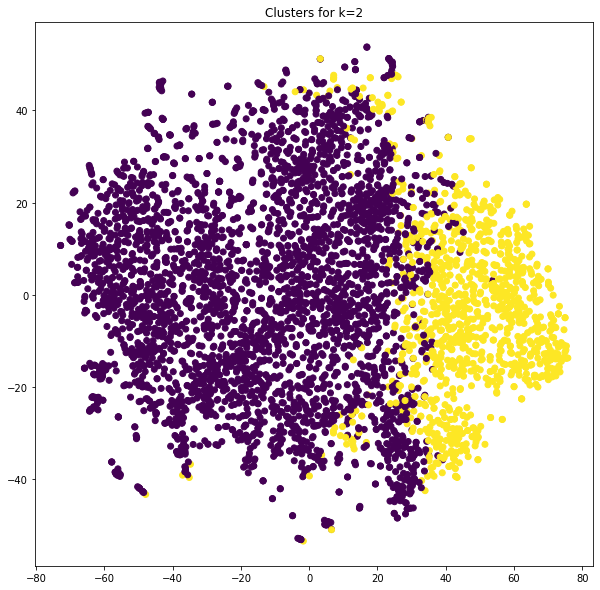

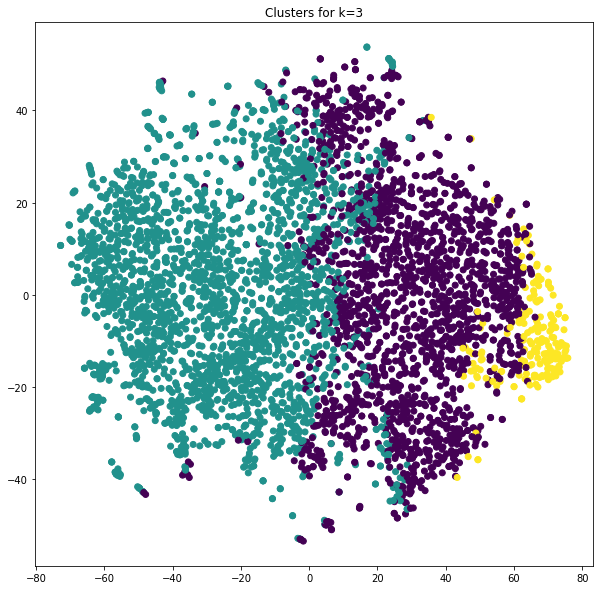

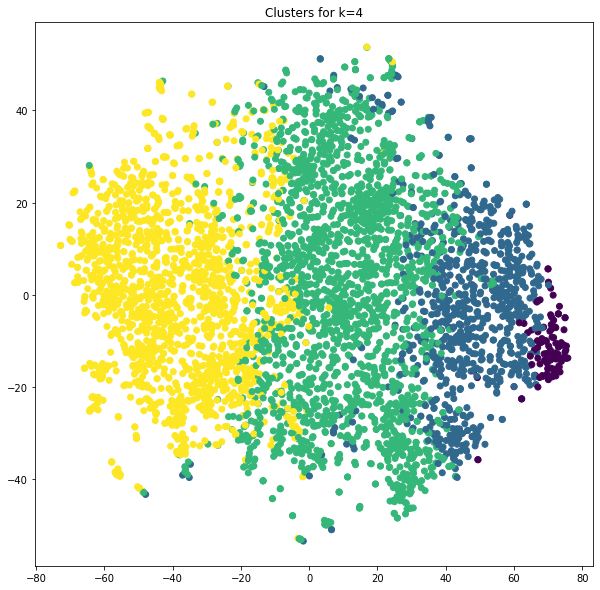

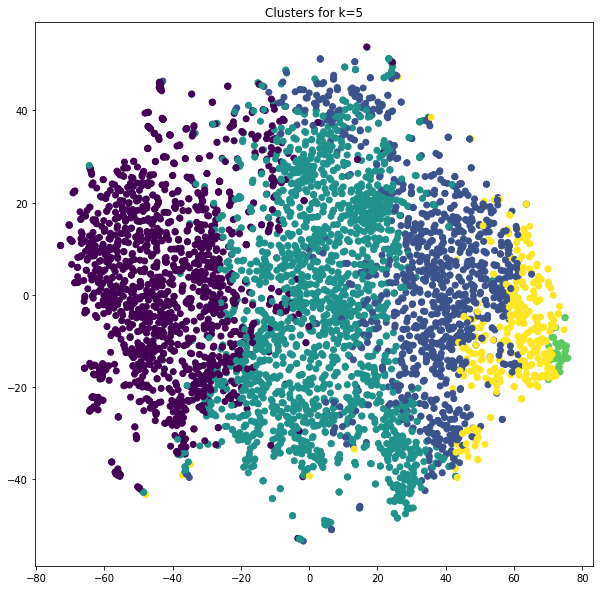

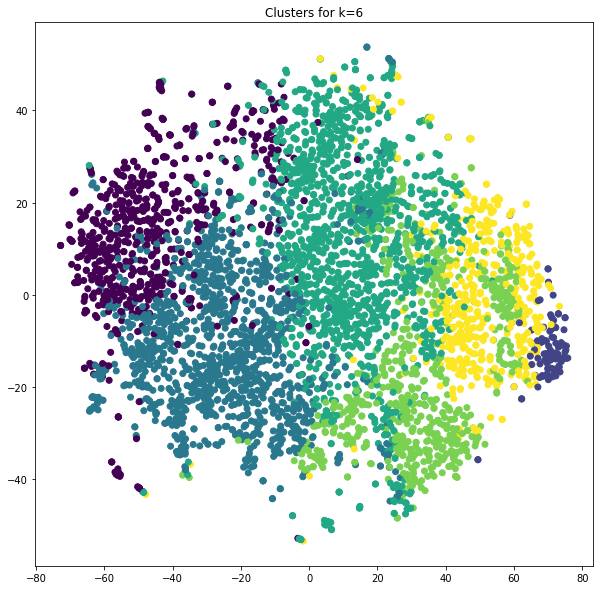

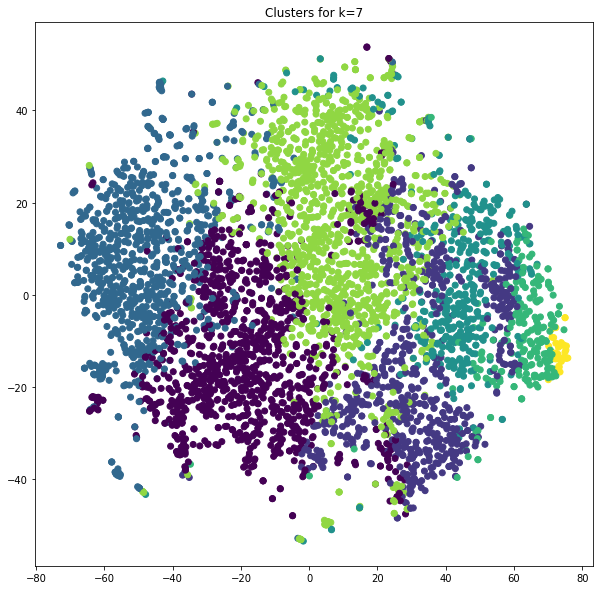

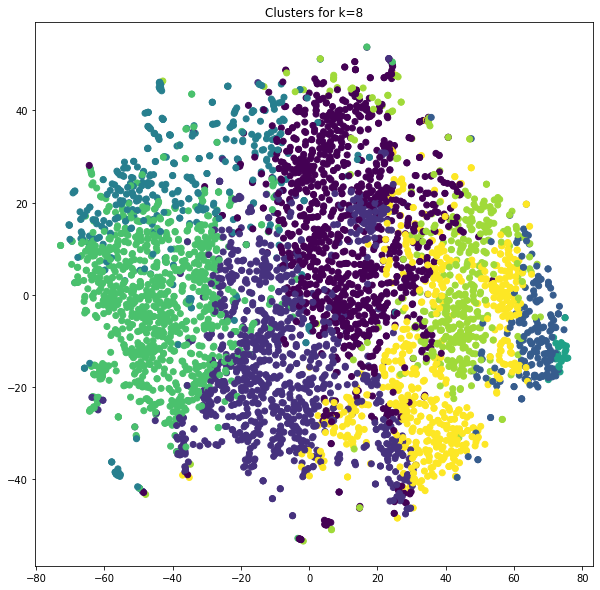

In [ ]:
from typing import List
import random
X=df['concatenated']
def cluster_kmeans(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    emb_matrix = np.array(emb_vecs)
    initial_centroids = emb_matrix[random.sample(range(len(emb_vecs)), n_clusters)]

    for _ in range(100):
        distances = np.linalg.norm(emb_matrix[:, np.newaxis] - initial_centroids, axis=-1)
        cluster_indices = np.argmin(distances, axis=-1)
        new_centroids = np.array([emb_matrix[cluster_indices == i].mean(axis=0) for i in range(n_clusters)])
        if np.all(initial_centroids == new_centroids):
            break

        initial_centroids = new_centroids

    return initial_centroids.tolist(), cluster_indices.tolist()
k_values = [2, 3, 4, 5,6,7,8]
all_centroids = []
all_cluster_indices = []

for k in k_values:
    centroids, cluster_indices = cluster_kmeans(embeddings, k)
    all_centroids.append(centroids)
    all_cluster_indices.append(cluster_indices)
from collections import Counter
import operator

import ast

def get_most_frequent_words(documents, top_n=10):
    counter = Counter()
    for doc in documents:
        words = ast.literal_eval(doc)
        counter.update(words)
    return sorted(counter.items(), key=operator.itemgetter(1), reverse=True)[:top_n]

for i, cluster_indices in enumerate(all_cluster_indices):
    print(f"Topics for k={k_values[i]}:")
    for cluster_index in range(k_values[i]):
        docs_in_cluster = [doc for j, doc in enumerate(X) if cluster_indices[j] == cluster_index]
        print(f"Cluster {cluster_index}: {get_most_frequent_words(docs_in_cluster)}")
import matplotlib.pyplot as plt

for i, cluster_indices in enumerate(all_cluster_indices):
    plt.figure(figsize=(10, 10))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_indices)
    plt.title(f'Clusters for k={k_values[i]}')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes
    """
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)


from sklearn.metrics import silhouette_score

k_values = [2, 3, 4, 5, 6,7,8]
silhouette_scores = []
purity_scores = []

for k in k_values:
    centroids, cluster_indices = cluster_kmeans(embeddings, k)

    silhouette_scores.append(silhouette_score(embeddings, cluster_indices))

    purity_scores.append(purity_score(Y, cluster_indices))



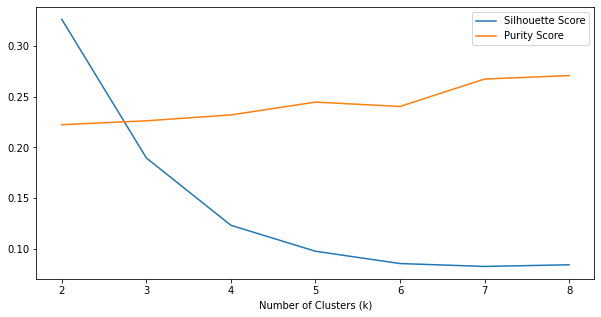

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, label='Silhouette Score')
plt.plot(k_values, purity_scores, label='Purity Score')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.show()

<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

The optimal number of clusters (k) is typically determined by looking for an “elbow” in the plot, which is a point representing a substantial decrease in the rate of decline of the silhouette score or increase in the purity score. This “elbow” point is considered a good balance between maximizing the scores and minimizing the number of clusters.

In the above, the Silhouette Score decreases as the number of clusters increases, while the Purity Score increases with the number of clusters. However, there isn’t a clear “elbow” point in either plot, making it difficult to definitively choose an optimal value for k.

One approach could be to choose a k where the Silhouette Score starts to level off and the Purity Score is reasonably high. From the plots, this seems to occur around k=3 or k=4 . But if we needed to choose one, K=3 seems good enough.

if we use WCSS like the function below, we see that its more on K=3 or K=4 as well for final decision we use the SilhouetteVisualizer method and see K=4 is more suitable and according to the plots the k=3 is too wide but k=4 seems a bit more balanced.

So we can go with k=3 as the number of clusters but k=4 can be a good choice as well.


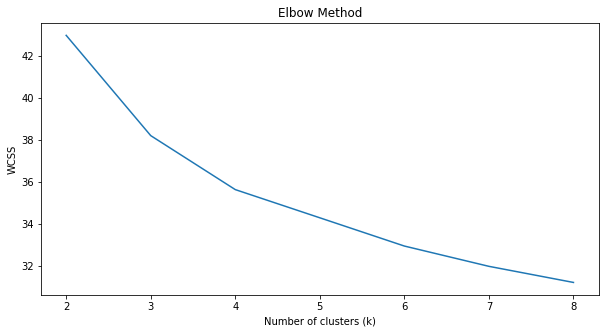

In [ ]:
def cluster_kmeans_WCSS(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    emb_matrix = np.array(emb_vecs)

    initial_centroids = emb_matrix[random.sample(range(len(emb_vecs)), n_clusters)]

    for _ in range(100):
        distances = np.linalg.norm(emb_matrix[:, np.newaxis] - initial_centroids, axis=-1)
        cluster_indices = np.argmin(distances, axis=-1)
        new_centroids = np.array([emb_matrix[cluster_indices == i].mean(axis=0) for i in range(n_clusters)])
        if np.all(initial_centroids == new_centroids):
            break

        initial_centroids = new_centroids
    wcss = np.sum([np.sum(np.square(emb_matrix[cluster_indices == i] - new_centroids[i])) for i in range(n_clusters)])

    return initial_centroids.tolist(), cluster_indices.tolist(), wcss
wcss_values = []
for k in k_values:
    centroids, cluster_indices, wcss = cluster_kmeans_WCSS(embeddings, k)
    wcss_values.append(wcss)

plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_values)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


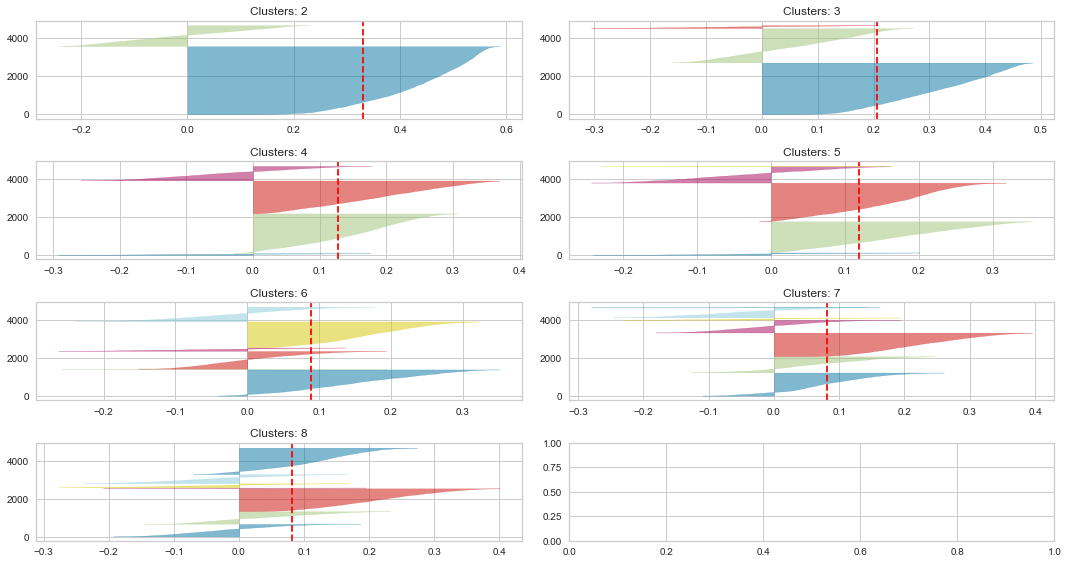

For k=2, the average silhouette score is: 0.32969147914054325
For k=3, the average silhouette score is: 0.20570943619488516
For k=4, the average silhouette score is: 0.12721562164670078
For k=5, the average silhouette score is: 0.1196582179146606
For k=6, the average silhouette score is: 0.08906400268576324
For k=7, the average silhouette score is: 0.08184215734851026
For k=8, the average silhouette score is: 0.08141653121075791


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(4, 2, figsize=(15,8))
avg_silhouette_scores = []
for i in [2, 3, 4, 5, 6, 7, 8]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(embeddings)
    ax[q][mod].set_title(f'Clusters: {i}')
    avg_silhouette_scores.append(visualizer.silhouette_score_)

plt.tight_layout()
plt.show()
for k, score in zip([2, 3, 4, 5, 6, 7, 8], avg_silhouette_scores):
    print(f"For k={k}, the average silhouette score is: {score}")


<div dir="rtl">
<h3>3-2-2.
Hierarchical clustering
</h3>
</div>

<div dir="rtl">
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</div>

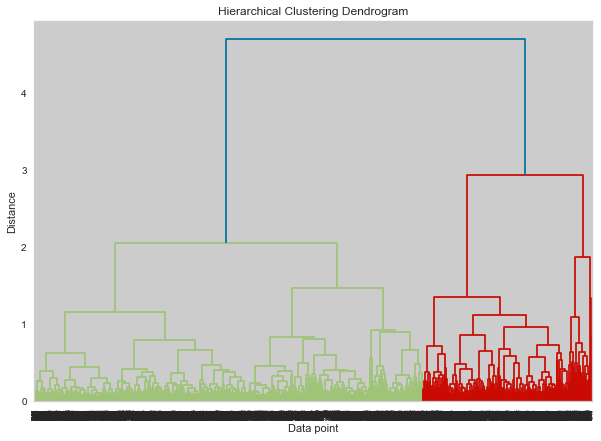

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(embeddings, 'ward')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()
